# Understanding Factors That Drive Churn in E-Commerce Platforms
By: Mizan Hakim

## Business Context

### Background

Dalam industri e-commerce yang semakin kompetitif, mempertahankan pelanggan menjadi tantangan strategis utama bagi perusahaan. Biaya untuk memperoleh pelanggan baru umumnya jauh lebih tinggi dibanding mempertahankan pelanggan yang sudah ada, sehingga memahami alasan di balik perilaku churn menjadi sangat penting.
Melalui analisis terhadap berbagai faktor seperti durasi pelanggan bergabung, jarak ke warehouse, kepuasan layanan, dan aktivitas transaksi, perusahaan dapat memperoleh wawasan yang lebih dalam mengenai karakteristik pelanggan yang berisiko churn. Diharapkan, hasil analisis ini dapat menjadi dasar bagi pengembangan strategi retensi dan promosi yang lebih personal dan efektif untuk membantu perusahaan mengurangi tingkat churn di masa mendatang.


### Problem Statements

Faktor-faktor apa yang memengaruhi kemungkinan pelanggan melakukan churn pada platform e-commerce?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Understanding

Dalam proses ini, kita akan melihat sekilas kondisi Dataset dan juga mengidentifikasi apakah terdapat nilai yang hilang, duplikasi, anomali, atau outlier dalam dataset. Kita juga akan memeriksa setiap jenis distribusi data kolom numerik, apakah normal, miring ke kiri, atau miring ke kanan.

Dataset ini dapat diakses [di sini](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data), dengan 20 kolom yang berisi nama dan deskripsi berikut:

1. E Comm CustomerID, Unique customer ID
2. E Comm Churn, Churn Flag
3. E Comm Tenure, Tenure of customer in organization
4. E Comm PreferredLoginDevice, Preferred login device of customer
5. E Comm CityTier, City tier
6. E Comm WarehouseToHome, Distance in between warehouse to home of customer
7. E Comm PreferredPaymentMode, Preferred payment method of customer
8. E Comm Gender, Gender of customer
9. E Comm HourSpendOnApp, Number of hours spend on mobile application or website
10. E Comm NumberOfDeviceRegistered, Total number of devices is registered on particular customer
11. E Comm PreferedOrderCat, Preferred order category of customer in last month
12. E Comm SatisfactionScore, Satisfactory score of customer on service
13. E Comm MaritalStatus, Marital status of customer
14. E Comm NumberOfAddress, Total number of address added on particular customer
15. E Comm Complain, Any complaint has been raised in last month
16. E Comm OrderAmountHikeFromlastYear, Percentage increases in order from last year
17. E Comm CouponUsed, Total number of coupon has been used in last month
18. E Comm OrderCount, Total number of orders has been places in last month
19. E Comm DaySinceLastOrder, Day Since last order by customer
20. E Comm CashbackAmount, Average cashback in last month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, skew, chi2_contingency, mannwhitneyu, ttest_ind
from IPython.display import display
import re
import string

import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(r"C:\Users\mizan\Downloads\E Commerce Dataset.xlsx")

### 1. Dataset Overview

In [2]:
display(df.head(),df.tail())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [3]:
df.shape

print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  5630
Number of columns:  20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
display(df.describe(), df.describe(include='object'))

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [6]:
columns = df.columns
total_unique = [len(df[col].unique()) for col in df.columns]
unique = [df[col].unique() for col in df.columns]

summary_desciption = pd.DataFrame({
    'column': columns ,
    'total_unique_value': total_unique,
    'unique_value_list': unique
})

summary_desciption

,column,total_unique_value,unique_value_list
0,CustomerID,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,2,"[1, 0]"
2,Tenure,37,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,3,"[3, 1, 2]"
5,WarehouseToHome,35,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
7,Gender,2,"[Female, Male]"
8,HourSpendOnApp,7,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,6,"[3, 4, 5, 2, 1, 6]"


**INITIAL FINDINGS:**

* Terdapat 5630 baris dan 20 kolom pada dataset ini.
* Semua tipedata pada seluruh terlihat benar.
* Terdapat 5 variabel yang memiliki nilai bukan angka, sisanya memiliki nilai angka.

##

### 2. Identifying Data Anomalies

In [7]:

df.columns = df.columns.str.strip()

#### 2.1 Kolom Numerik

In [8]:
df["Tenure"].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In [9]:
df["WarehouseToHome"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

In [10]:
df["HourSpendOnApp"].unique()	

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

In [11]:
df["NumberOfAddress"].unique()	

array([ 9,  7,  6,  8,  3,  2,  4, 10,  1,  5, 19, 21, 11, 20, 22])

In [12]:
df["OrderAmountHikeFromlastYear"].unique()	

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

In [13]:
df["CouponUsed"].unique()	

array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

In [14]:
df["OrderCount"].unique()	

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

In [15]:
df["DaySinceLastOrder"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

In [16]:
(df["CashbackAmount"] < 0).sum()

np.int64(0)

**FINDINGS:**

Tidak terlihat adanya nilai atau penulisan yang sekiranya salah, misalnya nilai negatif pada kolom-kolom numerik ini.

#### 2.2 Kolom Non-Numerik

In [17]:
df["PreferredLoginDevice"].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [18]:
df["PreferredPaymentMode"].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [19]:
df["PreferedOrderCat"].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

**FINDINGS:**

* Kolom PreferredLoginDevice memiliki salah satu nilai berupa "phone", yang tidak masuk akal karena sudah ada kategori "mobile phone". Jika "phone" dimaksudkan sebagai telepon kabel, hal ini tidak mungkin karena telepon kabel tidak dapat mengakses internet, apalagi untuk e-commerce.
* Kolom PreferredPaymentMode memiliki nilai seperti cc dan cod, yang merupakan singkatan dari metode pembayaran Credit Card dan Cash on Delivery. Selain itu, penulisan UPI akan diganti menjadi Unified Payment Interface untuk menjaga konsistensi penulisan.
* Kolom PreferedOrderCat akan digabungkan untuk nilai Mobile dan Mobile Phone menjadi Mobile Phone & Accessory, karena di salah satu e-commerce yaitu "Shopee" kategori Mobile dapat mencakup mobile phone maupun aksesoris. Penggabungan ini dilakukan untuk menstandarisasi nilai, agar pelanggan yang membeli hanya mobile phone di kategori Mobile tetap masuk dalam kategori yang tepat, sehingga analisis menjadi lebih aman dan konsisten.

##

### 3. Identifying Missing Values

In [20]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value/len(df))*100

missing_value_desciption = pd.DataFrame({
    'missing_value': missing_value,
    'missing_value_percentage': missing_value_percentage.round(2),
})

missing_value_desciption

,missing_value,missing_value_percentage
CustomerID,0,0.00
Churn,0,0.00
Tenure,264,4.69
PreferredLoginDevice,0,0.00
CityTier,0,0.00
WarehouseToHome,251,4.46
PreferredPaymentMode,0,0.00
Gender,0,0.00
HourSpendOnApp,255,4.53
NumberOfDeviceRegistered,0,0.00


<Axes: >

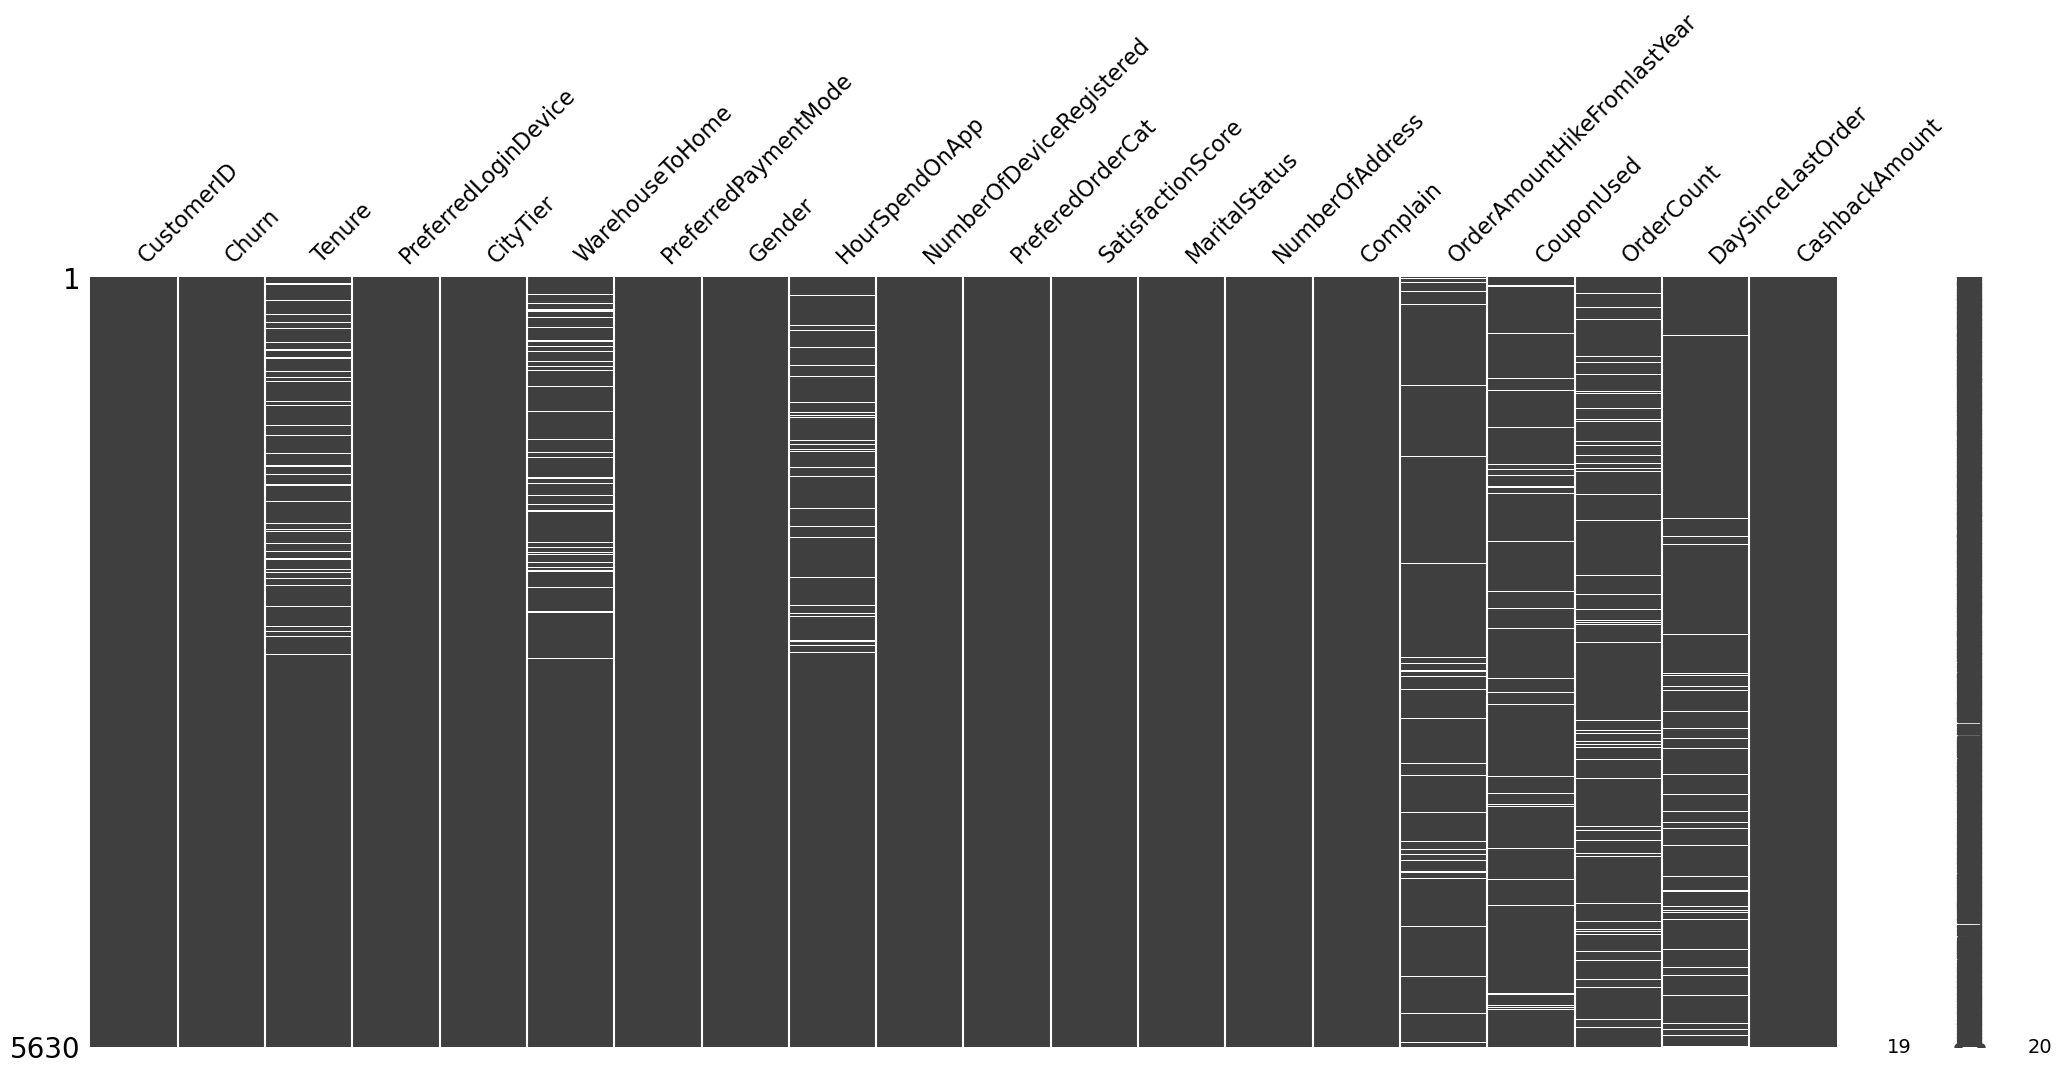

In [21]:
import missingno

missingno.matrix(df)

**FINDINGS:**

Terdapat beberapa kolom yang memiliki missing value, di antaranya: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder. Semua kolom ini termasuk dalam kategori numerik, sehingga missing value pada kolom-kolom tersebut akan diisi dengan rata-rata, baik menggunakan median maupun mean, tergantung dari distribusi datanya.

Langkah ini dilakukan karena jika kita menghapus semua baris yang memiliki missing value pada salah satu kolom, proporsi data yang hilang bisa melebihi 10%. Oleh karena itu, untuk menjaga integritas dataset, kita akan menggunakan fillna dengan nilai rata-rata.

##

### 4. Identifying Data Duplication

In [22]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

**FINDINGS:**
Tidak ada masalah duplikasi pada dataset.

##

### 5. Identifying Outlier

In [23]:
cols = ['Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

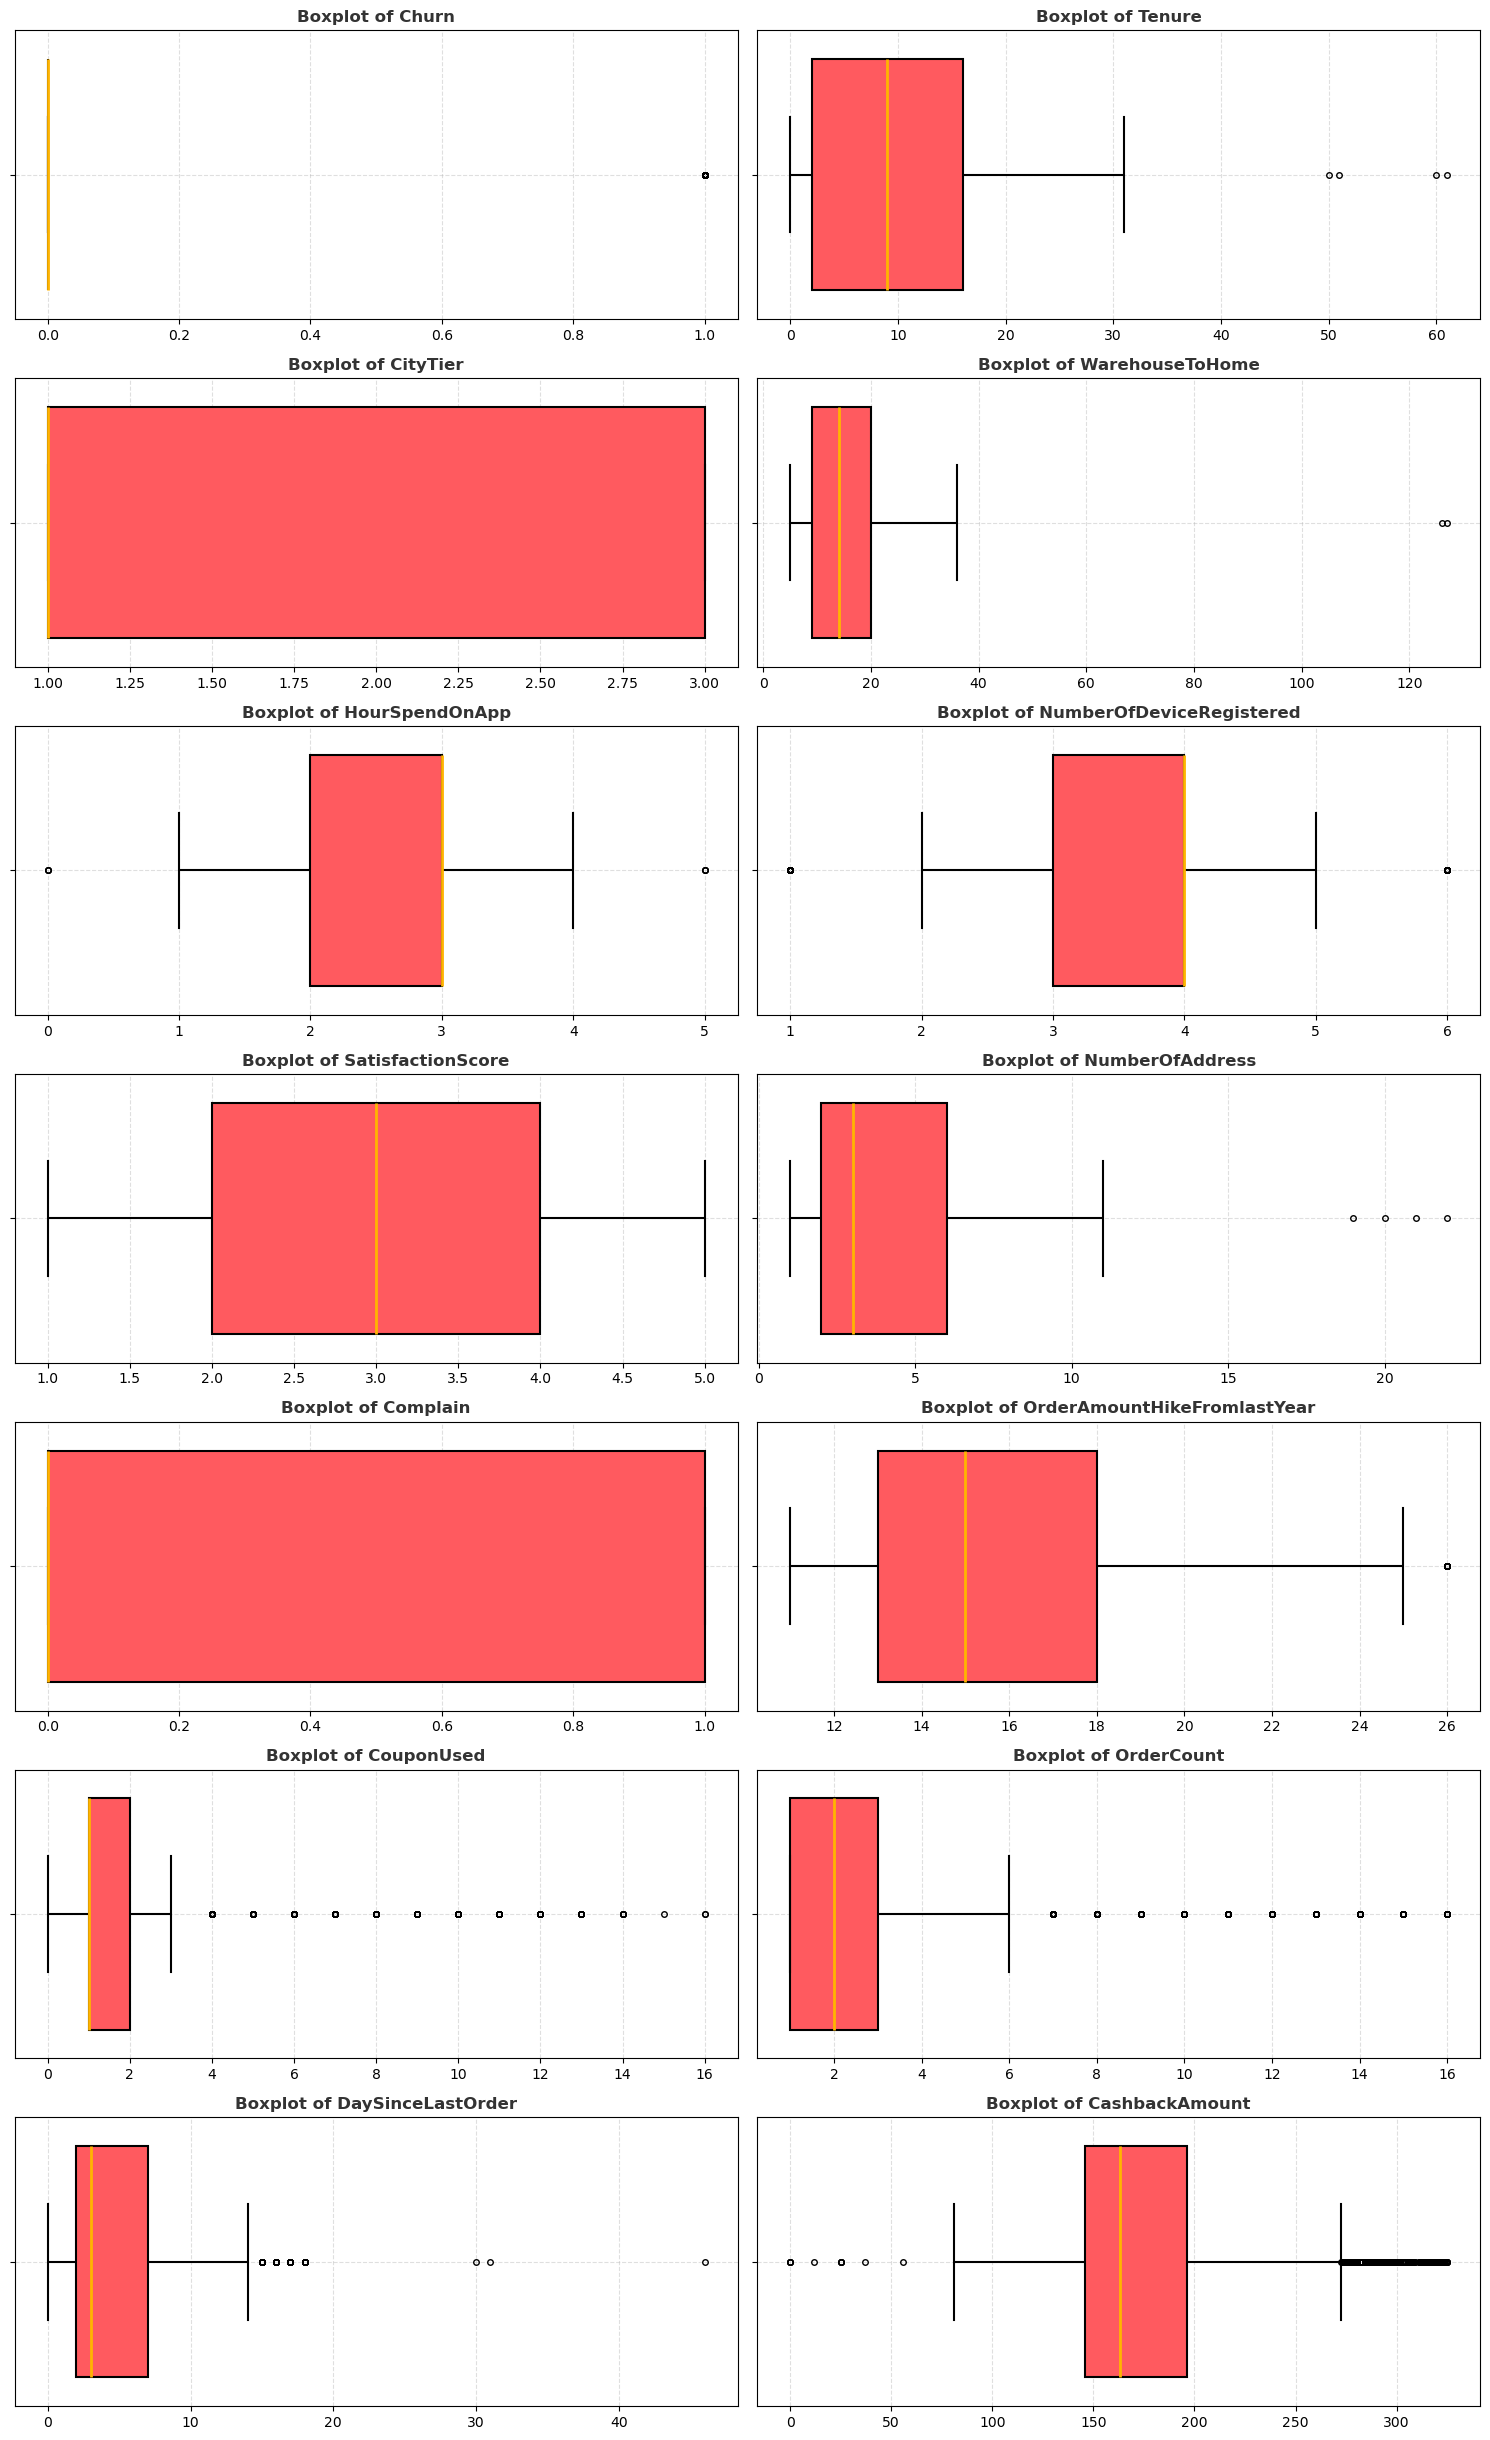

In [24]:
plt.figure(figsize=(15, 25)) 

for i, col in enumerate(cols, 1):
    plt.subplot(7, 2, i)  
    sns.boxplot(
        x=df[col],
        linewidth=1.5,
        fliersize=4,
        boxprops=dict(facecolor='#FF5A5F', edgecolor='black'),             
        whiskerprops=dict(color='black', linewidth=1.5),                   
        capprops=dict(color='black', linewidth=1.5),                       
        medianprops=dict(color='#FFB400', linewidth=2),                   
        flierprops=dict(marker='o', color='black', markersize=4, 
                        markeredgecolor='black')                          
    )
    plt.title(f'Boxplot of {col}', fontsize=12, fontweight='bold', color='#333333')
    plt.xlabel('')
    plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [25]:
summary_data = []

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Data outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df[col].count()
    outlier_pct = (outlier_count / total_count) * 100

    # Menyimpan ringkasan
    summary_data.append({
        'Column': col,
        'Q1': round(q1, 2),
        'Q3': round(q3, 2),
        'Outlier Count': outlier_count,
        'Total Count': total_count,
        'Outlier Proportion (% of Total Count)': round(outlier_pct, 2)
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,Column,Q1,Q3,Outlier Count,Total Count,Outlier Proportion (% of Total Count)
0,Churn,0.00,0.00,948,5630,16.84
1,Tenure,2.00,16.00,4,5366,0.07
2,CityTier,1.00,3.00,0,5630,0.00
3,WarehouseToHome,9.00,20.00,2,5379,0.04
4,HourSpendOnApp,2.00,3.00,6,5375,0.11
5,NumberOfDeviceRegistered,3.00,4.00,397,5630,7.05
6,SatisfactionScore,2.00,4.00,0,5630,0.00
7,NumberOfAddress,2.00,6.00,4,5630,0.07
8,Complain,0.00,1.00,0,5630,0.00
9,OrderAmountHikeFromlastYear,13.00,18.00,33,5365,0.62


**FINDINGS:**

* Banyak variabel aktivitas (OrderCount, CouponUsed, DaySinceLastOrder, CashbackAmount) menunjukkan skewed distribution dengan outlier di sisi kanan, artinya ada beberapa pelanggan dengan nilai sangat tinggi dibanding mayoritas.

* Variabel kategori atau diskrit seperti Churn, CityTier, Complain memang tidak memiliki distribusi normal dan outlier, karena memang bukan numerik kontinyu.

* Outlier yang muncul masuk akal secara domain, misalnya pelanggan sangat aktif atau lokasi rumah sangat jauh dari warehouse.

##

### 6. Identifying Data Distribution

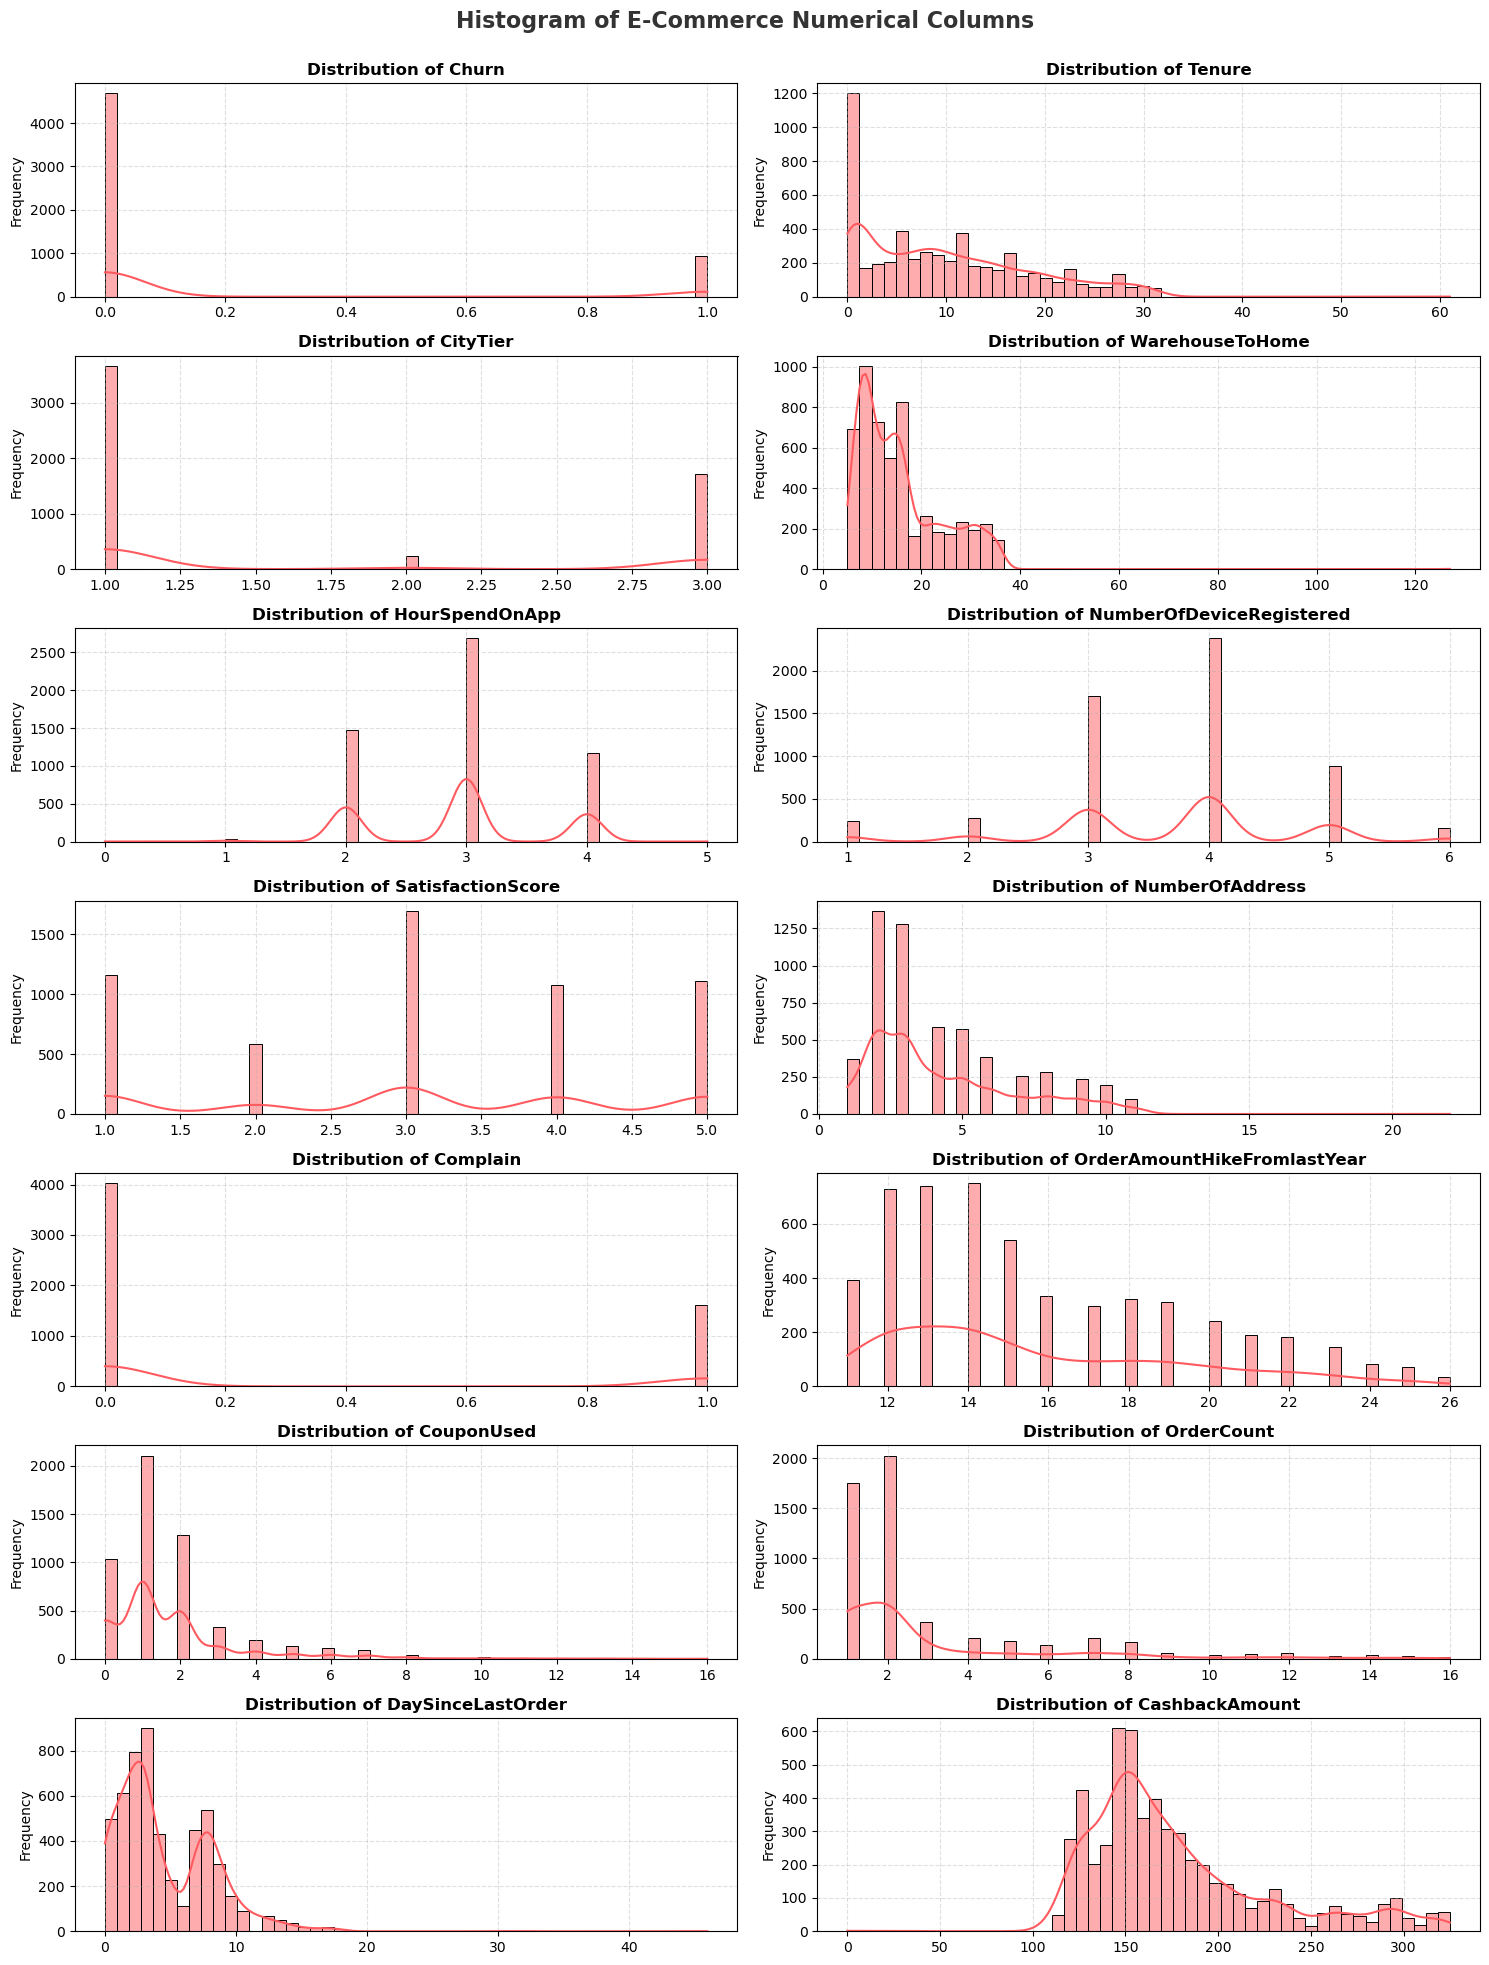

In [26]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(7, 2, i)  
    sns.histplot(
        data=df,
        x=col,
        bins=50,
        kde=True,
        color='#FF5A5F',
        edgecolor='black'
    )
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Histogram of E-Commerce Numerical Columns', fontsize=16, fontweight='bold', color='#333333')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [27]:
results = []

for col in cols:
    data = df[col].dropna()

    if len(data) >= 20:
        stat, p = normaltest(data)
        skew_val = skew(data)

         
        if skew_val > 0.5:
            skew_type = 'Right-skewed'
        elif skew_val < -0.5:
            skew_type = 'Left-skewed'
        else:
            skew_type = 'Approximately normal'

        results.append({
            'Column': col,
            'Statistic': round(stat, 4),
            'p-value': round(p, 5),
            'Normally Distributed': p > 0.05,
            'Skew Type': skew_type
        })
    else:
        results.append({
            'Column': col,
            'Statistic': None,
            'p-value': None,
            'Normally Distributed': 'Not enough data',
            'Skew Type': 'N/A'
        })


normality_skewtype_df = pd.DataFrame(results)

display(normality_skewtype_df)

,Column,Statistic,p-value,Normally Distributed,Skew Type
0,Churn,1578.8379,0.0,False,Right-skewed
1,Tenure,392.7525,0.0,False,Right-skewed
2,CityTier,54831.6380,0.0,False,Right-skewed
3,WarehouseToHome,2181.8315,0.0,False,Right-skewed
4,HourSpendOnApp,241.8224,0.0,False,Approximately normal
5,NumberOfDeviceRegistered,187.2338,0.0,False,Approximately normal
6,SatisfactionScore,2713.0325,0.0,False,Approximately normal
7,NumberOfAddress,861.4096,0.0,False,Right-skewed
8,Complain,2785.1819,0.0,False,Right-skewed
9,OrderAmountHikeFromlastYear,464.8789,0.0,False,Right-skewed


**Findings:**

* Tidak ada kolom numerik dalam dataset ini yang memiliki distribusi normal menurut uji D’Agostino dan Pearson (semua p-value = 0.0).

* Churn memiliki distribusi right-skewed (miring ke kanan), yang menunjukkan bahwa sebagian besar pelanggan tidak churn, sementara sebagian kecil pelanggan memiliki churn = 1.

* Tenure juga right-skewed, yang berarti sebagian besar pelanggan baru atau memiliki masa langganan singkat, sedangkan beberapa memiliki tenure yang sangat panjang.

* CityTier memiliki distribusi right-skewed; mayoritas pelanggan berada di kota tier rendah, dan hanya sedikit pelanggan berada di tier tinggi.

* WarehouseToHome termasuk right-skewed, sehingga sebagian besar pelanggan tinggal dekat dengan warehouse, sementara beberapa pelanggan memiliki jarak yang jauh.

* HourSpendOnApp tampak hampir normal secara visual, tetapi secara statistik tetap tidak terdistribusi normal. Mayoritas pelanggan menghabiskan 2–3 jam pada aplikasi, dengan beberapa pelanggan yang lebih tinggi.

* NumberOfDeviceRegistered secara visual hampir normal, tetapi secara statistik tidak normal. Sebagian besar pelanggan menggunakan 3–4 perangkat, sedangkan beberapa pelanggan memiliki jumlah perangkat yang ekstrem.

* SatisfactionScore tampak hampir normal secara visual, namun uji statistik menunjukkan tidak normal. Sebagian besar pelanggan memiliki skor kepuasan 2–4.

* NumberOfAddress memiliki distribusi right-skewed, dengan sebagian besar pelanggan memiliki 2–6 alamat, dan sebagian kecil memiliki alamat yang sangat banyak.

* Complain termasuk right-skewed; mayoritas pelanggan tidak mengajukan komplain, sementara beberapa pelanggan mengajukan lebih dari satu komplain.

* OrderAmountHikeFromlastYear memiliki distribusi right-skewed, di mana sebagian besar pelanggan mengalami kenaikan pesanan moderat, dan beberapa mengalami kenaikan yang sangat tinggi.

* CouponUsed termasuk right-skewed, mayoritas pelanggan menggunakan 1–2 kupon, namun sebagian kecil menggunakan jauh lebih banyak.

* OrderCount juga right-skewed, sebagian besar pelanggan melakukan 1–3 order, sementara beberapa memiliki jumlah order yang sangat tinggi.

* DaySinceLastOrder memiliki distribusi right-skewed; mayoritas pelanggan melakukan order dalam 2–7 hari terakhir, sementara sebagian kecil sudah lama tidak melakukan order.

* CashbackAmount termasuk right-skewed, dengan mayoritas pelanggan mendapatkan cashback moderat, dan sebagian kecil mendapatkan cashback yang sangat tinggi.

* Tingginya skewness pada kolom seperti OrderCount, CouponUsed, CashbackAmount, dan WarehouseToHome menunjukkan adanya nilai ekstrem atau outlier yang perlu diperhatikan saat pembersihan data dan analisis lebih lanjut.

* Distribusi yang miring pada sebagian besar variabel menunjukkan bahwa penggunaan median lebih tepat untuk analisis statistik atau pengsian missing value dibandingkan menggunakan rata-rata (mean).

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Cleaning

### 1. Handling Missing Value

In [28]:
cols_with_missing = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder'
]


for col in cols_with_missing:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


df[cols_with_missing].isnull().sum()

Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64

**Missing Value Treatment:** Dalam menangani missing value yang hanya terdapat pada kolom numerik, berdasarkan hasil pengecekan pada tahap data understanding, diketahui bahwa tidak ada kolom yang memiliki proporsi missing value lebih dari 5%, kecuali kolom ‘DaySinceLastOrder’ yang memiliki sekitar 5,45% nilai hilang. Mengingat proporsi tersebut masih relatif kecil, pengisian nilai yang hilang tidak akan memberikan perubahan signifikan terhadap distribusi data asli.

Namun, jika baris-baris dengan missing value dihapus (drop), terdapat kemungkinan lebih dari 6% data akan hilang karena setiap baris dengan nilai kosong tidak selalu berada pada kolom yang sama. Oleh karena itu, strategi yang digunakan adalah mengisi nilai kosong dengan median, karena sebagian besar kolom numerik memiliki distribusi yang tidak normal. Penggunaan median dianggap lebih representatif dibandingkan mean dalam menggambarkan nilai tengah dari variabel-variabel tersebut.

##

### 2. Handling Anomalies

#### 2.1 'PreferredLoginDevice'

In [29]:
print("Sebelum:")
print(df['PreferredLoginDevice'].value_counts())


df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')


print("\nSesudah:")
print(df['PreferredLoginDevice'].value_counts())

Sebelum:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

Sesudah:
PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


In [30]:
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

**Anomalies Treatment:** Dalam menangani anomaly pada kolom PreferredLoginDevice, dilakukan proses replacement terhadap nilai "Phone" menjadi "Mobile Phone". Hal ini dilakukan karena secara logika, perangkat “phone” seharusnya sama dengan “mobile phone”, mengingat telepon kabel tidak memiliki kemampuan untuk mengakses internet maupun melakukan login ke aplikasi atau situs e-commerce.

#### 2.2 'PreferredPaymentMode'

In [31]:
print("Sebelum:")
print(df['PreferredPaymentMode'].value_counts())

Sebelum:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


In [32]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'CC': 'Credit Card',
    'COD': 'Cash on Delivery',
    'UPI': 'Unified Payment Interface',
    'E wallet': 'E-wallet',
})

print("\nSesudah:")
print(df['PreferredPaymentMode'].value_counts())


Sesudah:
PreferredPaymentMode
Debit Card                   2314
Credit Card                  1774
E-wallet                      614
Cash on Delivery              514
Unified Payment Interface     414
Name: count, dtype: int64


**Anomalies Treatment:** Dalam menangani anomaly pada kolom PreferredPaymentMode, dilakukan proses replacement terhadap nilai yang penulisannya disingkat, seperti "CC" dan "COD", menjadi bentuk lengkap yaitu "Credit Card" dan "Cash on Delivery". Selain itu, dilakukan pula perbaikan pada penulisan yang tidak konsisten, seperti mengubah "E wallet" menjadi "E-wallet", serta mengganti singkatan "UPI" menjadi bentuk lengkap "Unified Payment Interface" untuk menjaga konsistensi penulisan dan kejelasan data.

#### 2.3 'PreferedOrderCat'

In [33]:
print("Sebelum:")
print(df['PreferedOrderCat'].value_counts())

Sebelum:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


In [34]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({
    'Mobile': 'Mobile Phone & Accessory',
    'Mobile Phone': 'Mobile Phone & Accessory'
})

print("\nSesudah:")
print(df['PreferedOrderCat'].value_counts())


Sesudah:
PreferedOrderCat
Mobile Phone & Accessory    2080
Laptop & Accessory          2050
Fashion                      826
Grocery                      410
Others                       264
Name: count, dtype: int64


**Anomalies Treatment:** Dalam menangani anomaly pada kolom PreferedOrderCat, dilakukan proses replacement untuk menstandarisasi kategori yang memiliki makna serupa. Nilai "Mobile" dan "Mobile Phone" digabungkan menjadi satu kategori yaitu "Mobile Phone & Accessory". Penggabungan ini dilakukan karena pada beberapa platform e-commerce, seperti Shopee, kategori "Mobile" dapat mencakup produk mobile phone maupun aksesorisnya. Dengan demikian, pelanggan yang membeli produk mobile atau aksesorisnya tetap dikelompokkan dalam kategori yang sama, sehingga analisis data menjadi lebih akurat, konsisten, dan tidak menimbulkan bias kategori.

##

### 3. Handling Irrelevant Columns

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Analysis

### 1. Churn Drivers Analysis

Secara umum, churn merupakan kondisi ketika pelanggan berhenti bertransaksi atau tidak lagi aktif menggunakan layanan dalam periode waktu tertentu. Perusahaan perlu memahami berbagai faktor yang dapat menyebabkan pelanggan melakukan churn, seperti pengalaman pengguna, metode pembayaran, tingkat kepuasan layanan, serta lama waktu pelanggan bergabung (tenure). Dengan memahami faktor-faktor tersebut, perusahaan dapat memperoleh insight mengenai karakteristik pelanggan yang cenderung churn, sehingga dapat menyusun strategi retensi yang lebih efektif di masa mendatang.

#### 1.1 Churn vs Not Churn Overview

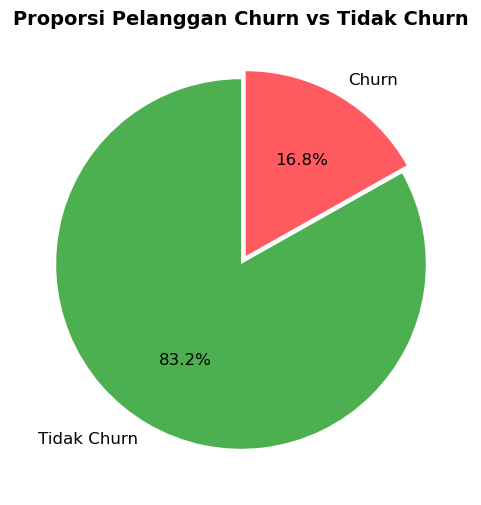

In [35]:
churn_counts = df['Churn'].value_counts()

labels = ['Tidak Churn', 'Churn']  
colors = ['#4CAF50', '#FF5A5F']   

plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',   
    startangle=90,
    colors=colors,
    explode=(0, 0.05),  
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title('Proporsi Pelanggan Churn vs Tidak Churn', fontsize=14, fontweight='bold')
plt.show()

**Key Key Takeaway:** Sebanyak 16,8% pelanggan tercatat melakukan churn, atau setara dengan sekitar satu dari enam pelanggan yang berhenti bertransaksi.

#### 1.2  Tenure to Churn 

In [36]:
tenure_churn = df[df['Churn'] == 1]['Tenure']
tenure_non_churn = df[df['Churn'] == 0]['Tenure']

stat, p = mannwhitneyu(tenure_churn, tenure_non_churn, alternative='two-sided')

print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Hasil: Terdapat perbedaan signifikan pada distribusi Tenure antara pelanggan churn dan tidak churn.")
else:
    print("Hasil: Tidak terdapat perbedaan signifikan pada distribusi Tenure antara pelanggan churn dan tidak churn.")

Statistic: 910384.0000
P-value: 0.0000
Hasil: Terdapat perbedaan signifikan pada distribusi Tenure antara pelanggan churn dan tidak churn.


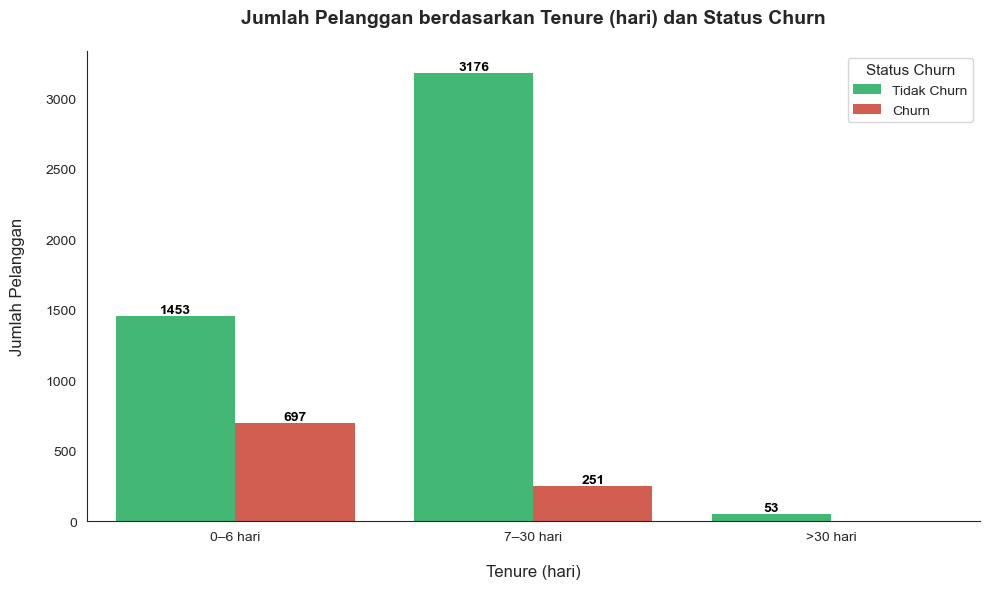

In [37]:
def categorize_tenure_days(x):
    if x <= 6:
        return '0–6 hari'
    elif 7 <= x <= 30:
        return '7–30 hari'
    else:
        return '>30 hari'

df['TenureGroup'] = df['Tenure'].apply(categorize_tenure_days)

tenure_counts = df.groupby(['TenureGroup', 'Churn']).size().reset_index(name='Count')

tenure_counts = tenure_counts[tenure_counts['Count'] > 0]

order = ['0–6 hari', '7–30 hari', '>30 hari']

palette_colors = {
    0: '#2ecc71',  
    1: '#e74c3c'   
}

plt.figure(figsize=(10,6))
sns.set_style("white")

ax = sns.barplot(
    data=tenure_counts,
    x='TenureGroup',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    order=order,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black', fontweight='bold'
        )

plt.title('Jumlah Pelanggan berdasarkan Tenure (hari) dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)

plt.xlabel('Tenure (hari)', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ['Tidak Churn', 'Churn'],
    title='Status Churn',
    fontsize=10,
    title_fontsize=11,
    loc='upper right'
)

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Takeaway:**
Dari visualisasi data terlihat bahwa pada kelompok tenure 0–6 hari, jumlah pelanggan yang churn cukup tinggi dibandingkan dengan kelompok tenure yang lebih lama. Pola yang terlihat adalah semakin lama masa penggunaan layanan, jumlah pelanggan yang churn semakin berkurang. Hal ini menunjukkan bahwa pelanggan yang baru bergabung cenderung lebih rentan untuk berhenti menggunakan layanan, sementara pelanggan yang sudah lama menggunakan layanan lebih cenderung bertahan.

Hasil uji statistik Mann-Whitney menunjukkan bahwa terdapat perbedaan yang signifikan secara statistik pada distribusi tenure antara pelanggan yang churn dan yang tidak churn. Ini menguatkan temuan visual bahwa durasi penggunaan layanan (tenure) memiliki pengaruh yang signifikan terhadap kemungkinan pelanggan melakukan churn atau bertahan. Dengan kata lain, tenure menjadi faktor penting yang perlu diperhatikan dalam strategi retensi pelanggan.

#### 1.3  WarehouseToHome to Churn 

In [40]:
import pandas as pd
from scipy.stats import mannwhitneyu

group_churn = df[df['Churn'] == 1]['WarehouseToHome']
group_not_churn = df[df['Churn'] == 0]['WarehouseToHome']

stat, p = mannwhitneyu(group_churn, group_not_churn, alternative='two-sided')

print(f"Mann-Whitney U statistic: {stat:.3f}")
print(f"P-value: {p:.5f}")

if p < 0.05:
    print("H0 ditolak: Terdapat perbedaan signifikan jarak warehouse ke rumah antara pelanggan churn dan tidak churn.")
else:
    print("H0 gagal ditolak: Tidak terdapat perbedaan signifikan jarak warehouse ke rumah antara pelanggan churn dan tidak churn.")

Mann-Whitney U statistic: 2492343.500
P-value: 0.00000
H0 ditolak: Terdapat perbedaan signifikan jarak warehouse ke rumah antara pelanggan churn dan tidak churn.


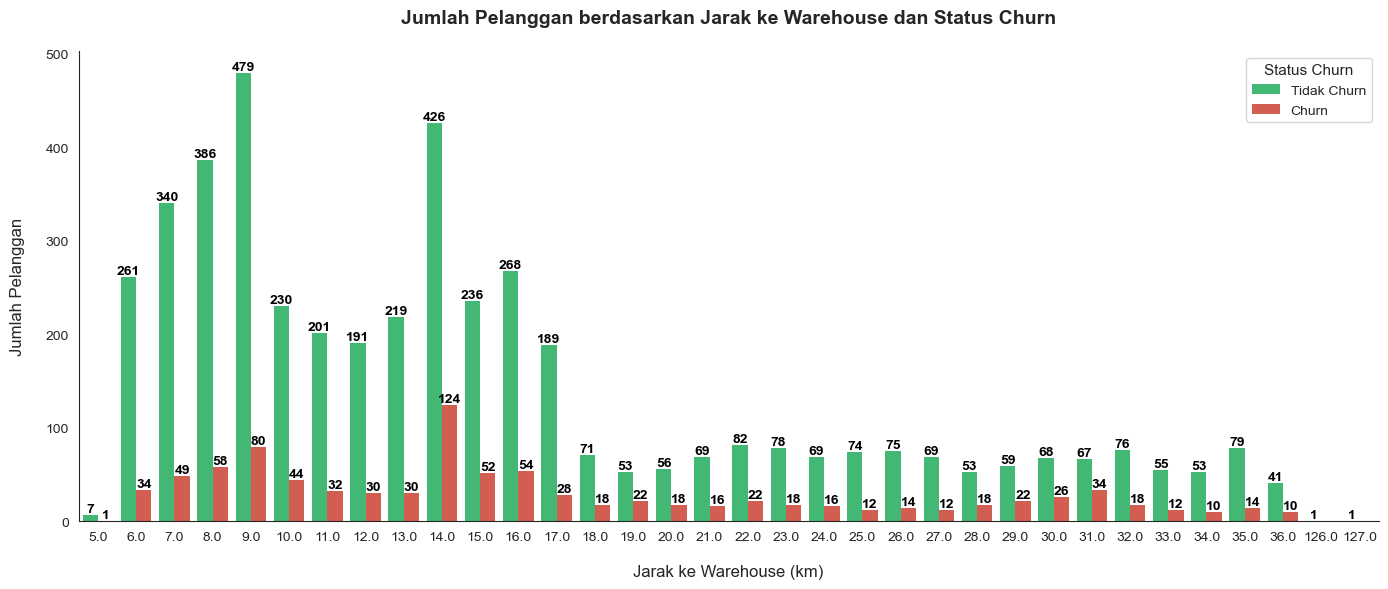

In [41]:
warehouse_counts = df.groupby(['WarehouseToHome', 'Churn']).size().reset_index(name='Count')

warehouse_counts = warehouse_counts[warehouse_counts['Count'] > 0]

palette_colors = {
    0: '#2ecc71',  
    1: '#e74c3c'   
}

plt.figure(figsize=(14,6))
sns.set_style("white")

ax = sns.barplot(
    data=warehouse_counts,
    x='WarehouseToHome',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black', fontweight='bold'
        )

plt.title('Jumlah Pelanggan berdasarkan Jarak ke Warehouse dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Jarak ke Warehouse (km)', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ['Tidak Churn', 'Churn'],
    title='Status Churn',
    fontsize=10,
    title_fontsize=11,
    loc='upper right'
)

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Takeaway:** Jarak ke warehouse mencerminkan kedekatan pelanggan dengan pusat distribusi, yang dapat memengaruhi kecepatan pengiriman dan pengalaman layanan. Dari grafik terlihat bahwa pelanggan dengan jarak 7–9 km dari warehouse memiliki jumlah pelanggan terbanyak, dengan puncaknya pada jarak 9 km (479 pelanggan tidak churn dan 80 churn). Setelah jarak 15 km, jumlah pelanggan mulai menurun signifikan, baik pada kelompok churn maupun tidak churn.

Proporsi pelanggan churn terlihat meningkat pada jarak yang lebih jauh, terutama setelah 13–15 km, di mana jumlah pelanggan churn mencapai 124 dibandingkan 426 pelanggan tidak churn. Sementara pada jarak di bawah 10 km, rasio churn relatif lebih rendah terhadap total pelanggan, menunjukkan bahwa pelanggan yang lebih dekat ke warehouse cenderung lebih loyal.

Temuan ini mengindikasikan bahwa jarak memiliki hubungan potensial dengan churn rate. Pelanggan yang jauh dari warehouse mungkin mengalami layanan pengiriman yang lebih lambat atau biaya logistik lebih tinggi, yang dapat meningkatkan risiko churn. Oleh karena itu, strategi retensi dapat difokuskan pada pelanggan yang berlokasi lebih jauh dengan menawarkan opsi pengiriman prioritas, subsidi ongkir, atau penambahan titik distribusi baru untuk memperpendek jarak layanan.

Uji Mann-Whitney menunjukkan bahwa p-value < 0.05, sehingga H₀ ditolak. Artinya, terdapat perbedaan yang signifikan secara statistik antara distribusi jarak pelanggan churn dan tidak churn. Dengan kata lain, kita dapat validasi dari hasil observasi dari chart bahwa jarak ke warehouse memiliki pengaruh signifikan terhadap kemungkinan pelanggan melakukan churn.

#### 1.4  HourSpendOnApp to Churn 

In [42]:
hour_churn = df[df['Churn'] == 1]['HourSpendOnApp']
hour_no_churn = df[df['Churn'] == 0]['HourSpendOnApp']

stat, p = mannwhitneyu(hour_no_churn, hour_churn)
print(f"Mann-Whitney U test statistic: {stat:.3f}, p-value: {p:.5f}")

if p < 0.05:
    print("Hasil: Terdapat perbedaan signifikan antara jam penggunaan app pada pelanggan yang churn dan tidak churn.")
else:
    print("Hasil: Tidak terdapat perbedaan signifikan antara jam penggunaan app pada pelanggan yang churn dan tidak churn.")

Mann-Whitney U test statistic: 2167074.000, p-value: 0.20946
Hasil: Tidak terdapat perbedaan signifikan antara jam penggunaan app pada pelanggan yang churn dan tidak churn.


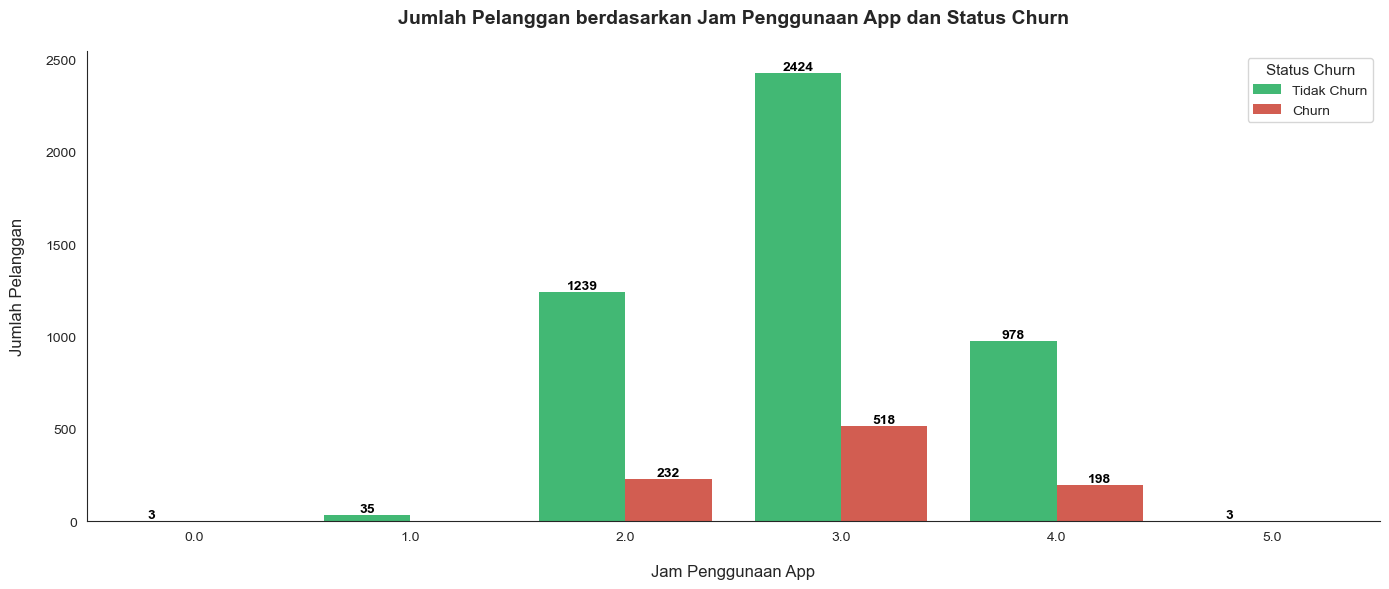

In [ ]:
hour_counts = df.groupby(['HourSpendOnApp', 'Churn']).size().reset_index(name='Count')
hour_counts = hour_counts[hour_counts['Count'] > 0]

palette_colors = {0: '#2ecc71', 1: '#e74c3c'}

plt.figure(figsize=(14,6))
sns.set_style("white")

ax = sns.barplot(
    data=hour_counts,
    x='HourSpendOnApp',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black', fontweight='bold'
        )

plt.title('Jumlah Pelanggan berdasarkan Jam Penggunaan App dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Jam Penggunaan App', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ['Tidak Churn', 'Churn'],
    title='Status Churn',
    fontsize=10,
    title_fontsize=11,
    loc='upper right'
)

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Takeaway:** Berdasarkan grafik barplot, terlihat bahwa mayoritas pelanggan menghabiskan sekitar 3 jam pada aplikasi, baik yang churn maupun yang tidak churn, diikuti oleh pelanggan yang menggunakan aplikasi 2 jam dan 4 jam. Hal ini menunjukkan bahwa pola penggunaan aplikasi terbanyak berkonsentrasi pada kisaran 2–4 jam.

Namun, hasil uji Mann-Whitney menunjukkan bahwa perbedaan distribusi HourSpendOnApp antara pelanggan yang churn dan tidak churn tidak signifikan (H0 tidak ditolak). Dengan kata lain, meskipun ada perbedaan jumlah pelanggan pada masing-masing jam, secara statistik penggunaan jam aplikasi tidak berpengaruh signifikan terhadap churn.

#### 1.5  SatisfactionScore to Churn 

In [44]:
churn_yes = df[df['Churn'] == 1]['SatisfactionScore']
churn_no = df[df['Churn'] == 0]['SatisfactionScore']

stat, p = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

if p < 0.05:
    print(f"H0 ditolak (p={p:.4f}): Ada perbedaan signifikan antara SatisfactionScore churn dan tidak churn")
else:
    print(f"H0 tidak ditolak (p={p:.4f}): Tidak ada perbedaan signifikan antara SatisfactionScore churn dan tidak churn")

H0 ditolak (p=0.0000): Ada perbedaan signifikan antara SatisfactionScore churn dan tidak churn


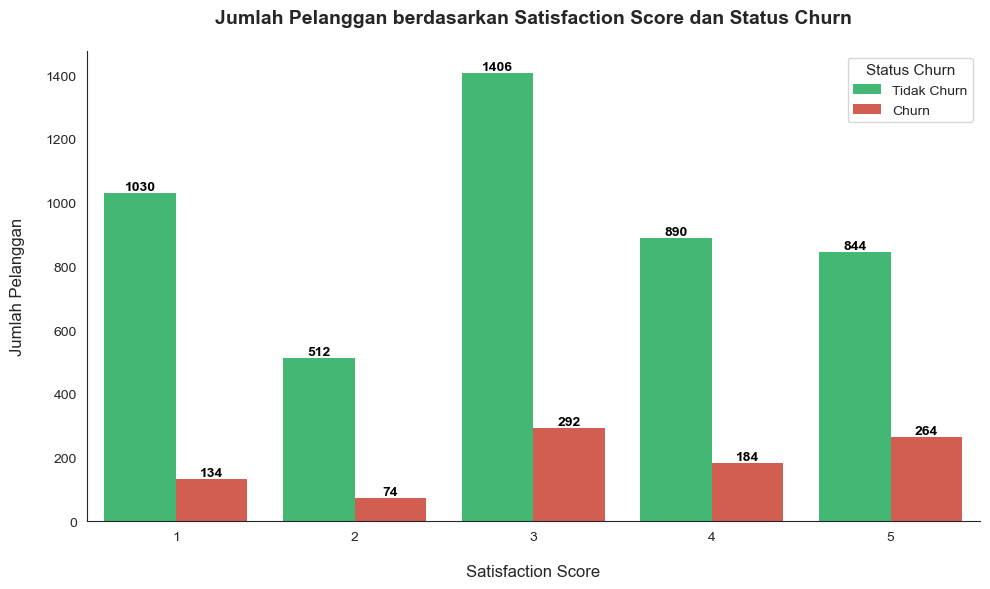

In [ ]:
satisfaction_counts = df.groupby(['SatisfactionScore', 'Churn']).size().reset_index(name='Count')

satisfaction_counts = satisfaction_counts[satisfaction_counts['Count'] > 0]

palette_colors = {
    0: '#2ecc71',  
    1: '#e74c3c'   
}

plt.figure(figsize=(10,6))
sns.set_style("white")

ax = sns.barplot(
    data=satisfaction_counts,
    x='SatisfactionScore',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black', fontweight='bold'
        )

plt.title('Jumlah Pelanggan berdasarkan Satisfaction Score dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Satisfaction Score', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ['Tidak Churn', 'Churn'],
    title='Status Churn',
    fontsize=10,
    title_fontsize=11,
    loc='upper right'
)

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Takeaway:** Satisfaction Score menggambarkan tingkat kepuasan pelanggan terhadap layanan (service) e-commerce dukungan pelanggan dan penanganan keluhan. Dari grafik terlihat bahwa pelanggan dengan skor 3 memiliki jumlah terbanyak (1.406 pelanggan tidak churn dan 292 churn). Namun, pola yang muncul menunjukkan bahwa pelanggan dengan skor kepuasan tinggi (4–5) justru memiliki jumlah churn yang lebih besar dibanding kelompok dengan skor rendah (1–2).

Hal ini mengindikasikan bahwa tingkat kepuasan terhadap layanan tidak berbanding lurus dengan loyalitas pelanggan. Pelanggan yang menilai layanan tinggi masih bisa churn, kemungkinan karena faktor lain seperti harga, promosi kompetitor, atau variasi produk. Sebaliknya, pelanggan dengan skor kepuasan rendah tetap bertahan karena faktor harga kompetitif atau program promosi  yang masih memberikan nilai lebih meskipun layanan belum optimal.

Hasil uji Mann-Whitney menunjukkan p-value < 0.05, sehingga H₀ ditolak. Artinya, terdapat perbedaan signifikan antara distribusi skor kepuasan layanan pada pelanggan churn dan tidak churn. Namun, ketika hasil ini dikaitkan dengan grafik, terlihat bahwa hubungan antara kepuasan layanan dan churn tidak bersifat langsung (non-linear) — pelanggan dengan skor kepuasan tinggi belum tentu lebih loyal, dan pelanggan dengan skor rendah belum tentu mudah churn.

#### 1.6  Complain to Churn 

In [46]:
churn_yes = df[df['Churn'] == 1]['Complain']
churn_no = df[df['Churn'] == 0]['Complain']

stat, p = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

if p < 0.05:
    print(f"H0 ditolak (p={p:.4f}): Ada perbedaan signifikan antara Complain churn dan tidak churn")
else:
    print(f"H0 tidak ditolak (p={p:.4f}): Tidak ada perbedaan signifikan antara Complain churn dan tidak churn")

H0 ditolak (p=0.0000): Ada perbedaan signifikan antara Complain churn dan tidak churn


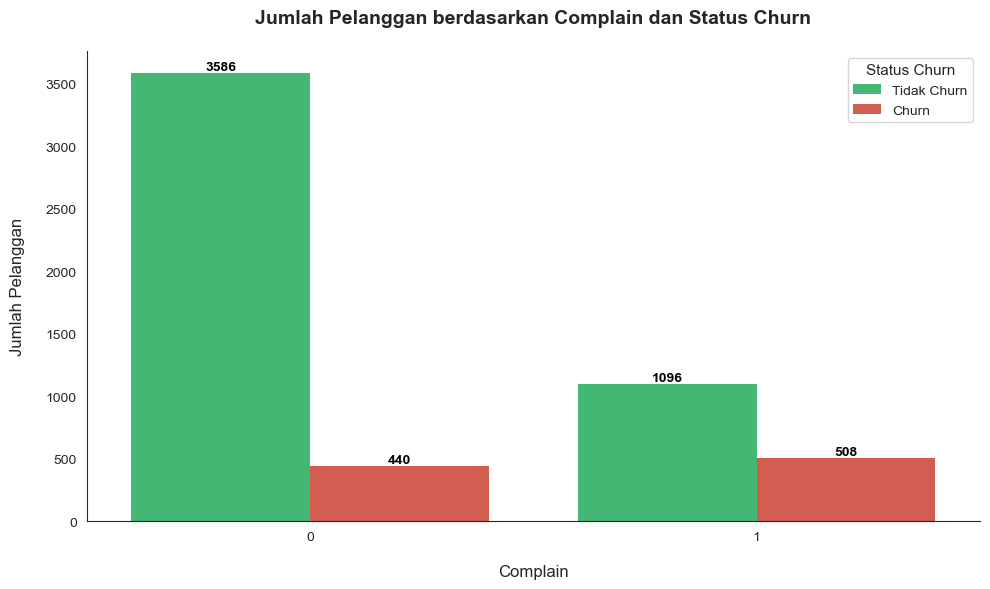

In [47]:
complain_counts = df.groupby(['Complain', 'Churn']).size().reset_index(name='Count')

complain_counts = complain_counts[complain_counts['Count'] > 0]

palette_colors = {0: '#2ecc71', 1: '#e74c3c'}

plt.figure(figsize=(10,6))
sns.set_style("white")

ax = sns.barplot(
    data=complain_counts,
    x='Complain',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black', fontweight='bold'
        )

plt.title('Jumlah Pelanggan berdasarkan Complain dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Complain', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ['Tidak Churn', 'Churn'],
    title='Status Churn',
    fontsize=10,
    title_fontsize=11,
    loc='upper right'
)

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Takeaway:** Complaint Status menunjukkan apakah pelanggan pernah mengajukan keluhan terhadap layanan e-commerce. Dari grafik terlihat bahwa pelanggan yang tidak pernah komplain mendominasi dengan 3.586 pelanggan tidak churn dan 440 pelanggan churn. Sementara itu, pelanggan yang pernah komplain berjumlah lebih sedikit, yaitu 1.096 pelanggan tidak churn dan 508 pelanggan churn.

Proporsi churn terlihat jauh lebih tinggi pada kelompok yang pernah mengajukan komplain, dengan hampir sepertiga pelanggan komplain akhirnya churn, dibandingkan hanya sebagian kecil pada kelompok tanpa komplain. Hal ini menunjukkan bahwa pengalaman negatif yang mendorong pelanggan untuk melakukan komplain memiliki dampak kuat terhadap keputusan untuk berhenti menggunakan platform.

Temuan ini mengindikasikan bahwa pengelolaan keluhan pelanggan menjadi faktor kunci dalam menekan churn. Komplain yang tidak ditangani dengan cepat atau memuaskan dapat mempercepat keputusan pelanggan untuk berpindah ke kompetitor. Oleh karena itu, perusahaan perlu memperkuat responsivitas layanan pelanggan, menyediakan saluran komunikasi yang mudah diakses, serta menindaklanjuti komplain secara proaktif agar pelanggan merasa dihargai dan dipulihkan kepercayaannya.

#### 1.7  OrderAmountHikeFromlastYear to Churn 

In [ ]:
churn_yes = df[df['Churn'] == 1]['OrderAmountHikeFromlastYear']
churn_no = df[df['Churn'] == 0]['OrderAmountHikeFromlastYear']

stat, p = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

if p < 0.05:
    print(f"H0 ditolak (p={p:.4f}): Ada perbedaan signifikan antara OrderAmountHikeFromlastYear churn dan tidak churn")
else:
    print(f"H0 tidak ditolak (p={p:.4f}): Tidak ada perbedaan signifikan antara OrderAmountHikeFromlastYear churn dan tidak churn")

H0 tidak ditolak (p=0.1044): Tidak ada perbedaan signifikan antara OrderAmountHikeFromlastYear churn dan tidak churn


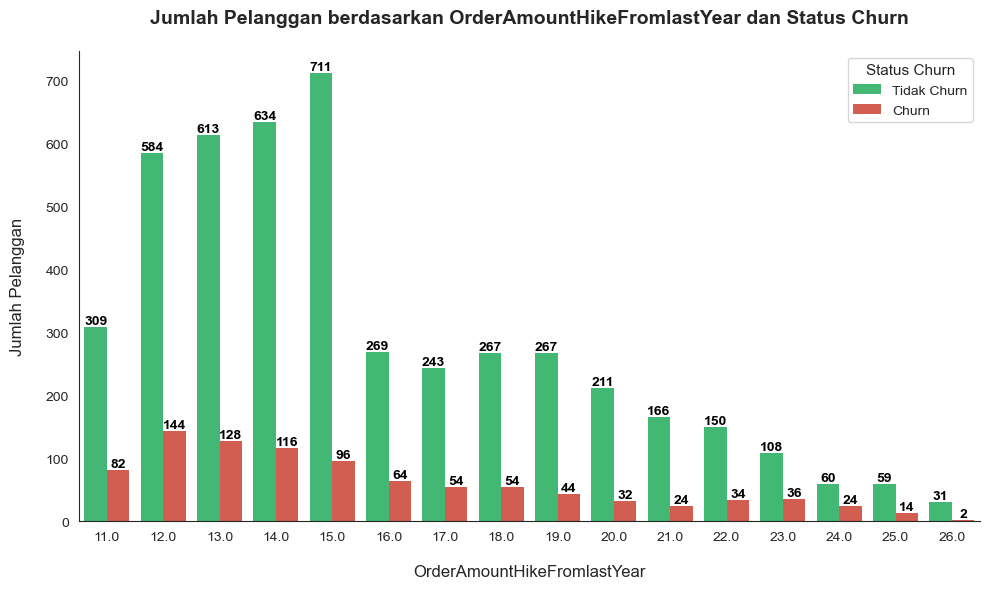

In [ ]:
order_counts = df.groupby(['OrderAmountHikeFromlastYear', 'Churn']).size().reset_index(name='Count')

order_counts = order_counts[order_counts['Count'] > 0]

palette_colors = {0: '#2ecc71', 1: '#e74c3c'}

plt.figure(figsize=(10,6))
sns.set_style("white")

ax = sns.barplot(
    data=order_counts,
    x='OrderAmountHikeFromlastYear',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black', fontweight='bold'
        )

plt.title('Jumlah Pelanggan berdasarkan OrderAmountHikeFromlastYear dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('OrderAmountHikeFromlastYear', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ['Tidak Churn', 'Churn'],
    title='Status Churn',
    fontsize=10,
    title_fontsize=11,
    loc='upper right'
)

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Takeaway:** OrderAmountHikeFromLastYear menggambarkan persentase peningkatan nilai transaksi pelanggan dibanding tahun sebelumnya. Dari grafik terlihat bahwa mayoritas pelanggan, baik churn maupun tidak churn, berada pada rentang kenaikan 12–15%, dengan dominasi pelanggan tidak churn di setiap level. Secara visual, tampak bahwa pelanggan yang mengalami kenaikan transaksi lebih besar cenderung tetap bertahan di platform.

Namun, hasil uji Mann-Whitney menunjukkan H₀ tidak dapat ditolak, yang berarti tidak terdapat perbedaan signifikan antara distribusi OrderAmountHikeFromLastYear pelanggan churn dan tidak churn. Dengan kata lain, kenaikan nilai transaksi tahunan tidak terbukti berpengaruh secara statistik terhadap churn.

Temuan ini menunjukkan bahwa meskipun secara logika bisnis peningkatan pembelian diharapkan berkorelasi dengan loyalitas, pada e-commerce ini kenaikan nilai transaksi belum mencerminkan perilaku retensi pelanggan. Faktor lain seperti efektivitas promosi kemungkinan lebih menentukan keputusan pelanggan untuk tetap berbelanja.

#### 1.8 CouponUsed to Churn 

In [50]:
churned = df[df['Churn'] == 1]['CouponUsed']
not_churned = df[df['Churn'] == 0]['CouponUsed']

stat, p = mannwhitneyu(churned, not_churned, alternative='two-sided')

print(f"Uji Mann–Whitney U untuk CouponUsed vs Churn")
print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")

if p < 0.05:
    print("Kesimpulan: H0 ditolak → Terdapat perbedaan signifikan dalam distribusi jumlah kupon yang digunakan antara pelanggan churn dan tidak churn.")
else:
    print("Kesimpulan: H0 tidak dapat ditolak → Tidak terdapat perbedaan signifikan dalam distribusi jumlah kupon yang digunakan antara pelanggan churn dan tidak churn.")

Uji Mann–Whitney U untuk CouponUsed vs Churn
Statistic = 2192814.5000, p-value = 0.5430
Kesimpulan: H0 tidak dapat ditolak → Tidak terdapat perbedaan signifikan dalam distribusi jumlah kupon yang digunakan antara pelanggan churn dan tidak churn.


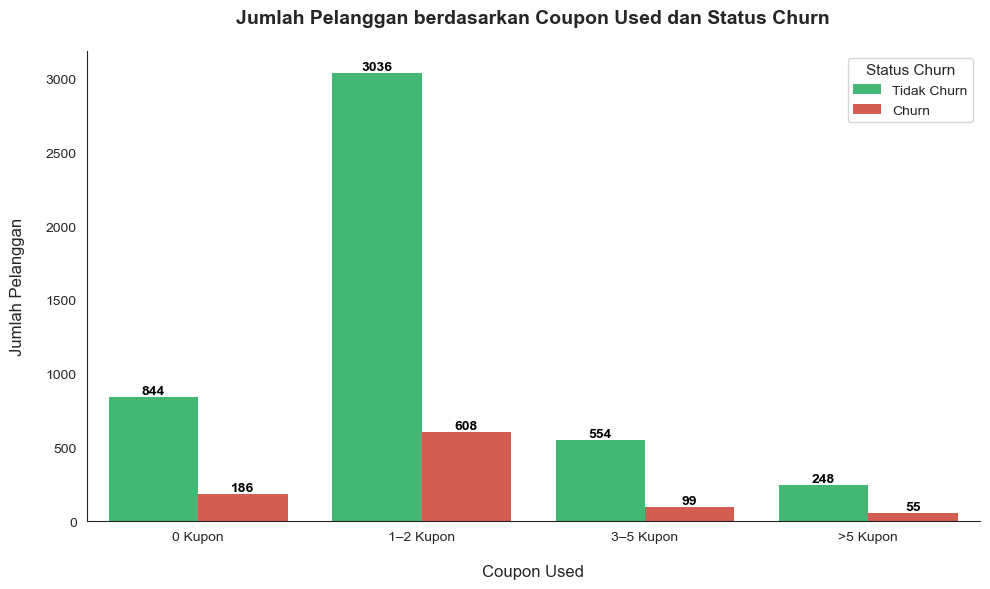

In [ ]:
def categorize_coupon(x):
    if x == 0:
        return '0 Kupon'
    elif 1 <= x <= 2:
        return '1–2 Kupon'
    elif 3 <= x <= 5:
        return '3–5 Kupon'
    else:
        return '>5 Kupon'

df['CouponGroup'] = df['CouponUsed'].apply(categorize_coupon)

coupon_counts = df.groupby(['CouponGroup', 'Churn']).size().reset_index(name='Count')
coupon_counts = coupon_counts[coupon_counts['Count'] > 0]

order = ['0 Kupon', '1–2 Kupon', '3–5 Kupon', '>5 Kupon']

palette_colors = {0: '#2ecc71', 1: '#e74c3c'}

plt.figure(figsize=(10,6))
sns.set_style("white")

ax = sns.barplot(
    data=coupon_counts,
    x='CouponGroup',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    order=order,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', fontweight='bold')

plt.title('Jumlah Pelanggan berdasarkan Coupon Used dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Coupon Used', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Tidak Churn', 'Churn'],
           title='Status Churn', fontsize=10,
           title_fontsize=11, loc='upper right')

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Takeaway:** Variabel Coupon Used menggambarkan seberapa sering pelanggan menggunakan kupon promo saat bertransaksi di platform e-commerce. Berdasarkan grafik, pelanggan yang menggunakan 1–2 kupon merupakan kelompok terbesar dengan 3.036 pelanggan tidak churn dan 608 pelanggan churn. Jumlah pelanggan baik yang tidak churn dan churn menurun seiring dengan peningkatan frekuensi penggunaan kupon, menunjukkan bahwa mayoritas pengguna hanya memanfaatkan promosi sesekali.

Namun, hasil uji Mann-Whitney menunjukkan H₀ tidak dapat ditolak, yang berarti tidak terdapat perbedaan signifikan dalam distribusi penggunaan kupon antara pelanggan churn dan tidak churn. Dengan kata lain, frekuensi penggunaan kupon tidak memiliki hubungan yang signifikan terhadap kemungkinan pelanggan berhenti bertransaksi.

Secara bisnis, hal ini menunjukkan bahwa aktivitas penggunaan kupon tidak cukup kuat untuk memprediksi loyalitas pelanggan. Pelanggan yang sering menggunakan kupon mungkin tetap churn setelah promosi berakhir, sedangkan pelanggan yang jarang menggunakan kupon bisa tetap setia karena faktor lain seperti kepuasan layanan, kualitas produk, atau kebiasaan belanja.

#### 1.9 OrderCount to Churn 

In [ ]:
churned = df[df['Churn'] == 1]['OrderCount']
not_churned = df[df['Churn'] == 0]['OrderCount']

stat, p = mannwhitneyu(churned, not_churned, alternative='two-sided')

print("Uji Mann–Whitney U untuk OrderCount vs Churn")
print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")

if p < 0.05:
    print("Kesimpulan: H0 ditolak → Terdapat perbedaan signifikan dalam distribusi jumlah pesanan antara pelanggan churn dan tidak churn.")
else:
    print("Kesimpulan: H0 tidak dapat ditolak → Tidak terdapat perbedaan signifikan dalam distribusi jumlah pesanan antara pelanggan churn dan tidak churn.")

Uji Mann–Whitney U untuk OrderCount vs Churn
Statistic = 2125452.0000, p-value = 0.0305
Kesimpulan: H0 ditolak → Terdapat perbedaan signifikan dalam distribusi jumlah pesanan antara pelanggan churn dan tidak churn.


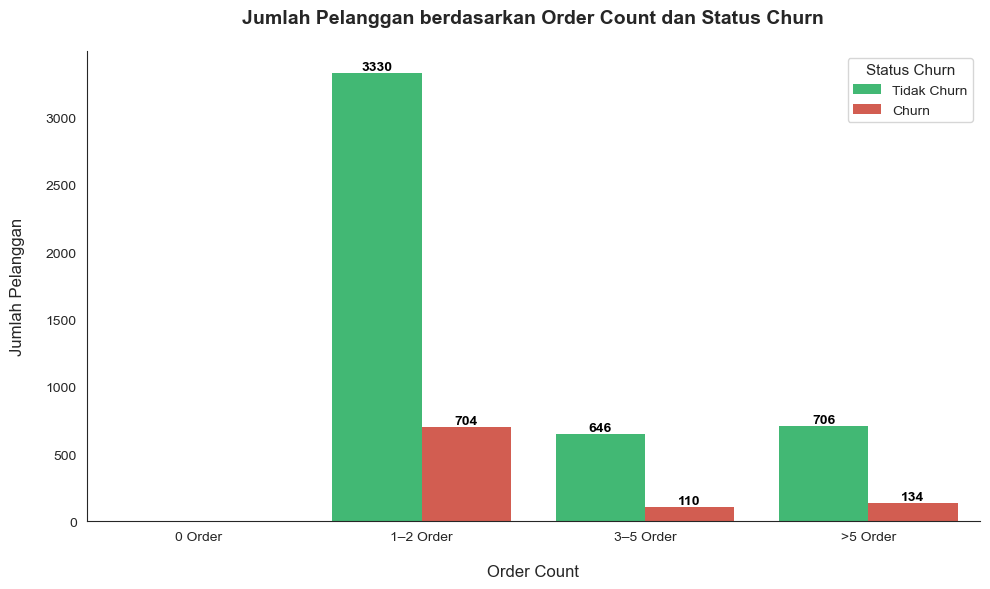

In [ ]:
def categorize_order(x):
    if x == 0:
        return '0 Order'
    elif 1 <= x <= 2:
        return '1–2 Order'
    elif 3 <= x <= 5:
        return '3–5 Order'
    else:
        return '>5 Order'

df['OrderGroup'] = df['OrderCount'].apply(categorize_order)

order_counts = df.groupby(['OrderGroup', 'Churn']).size().reset_index(name='Count')
order_counts = order_counts[order_counts['Count'] > 0]

order = ['0 Order', '1–2 Order', '3–5 Order', '>5 Order']

palette_colors = {0: '#2ecc71', 1: '#e74c3c'}

plt.figure(figsize=(10,6))
sns.set_style("white")

ax = sns.barplot(
    data=order_counts,
    x='OrderGroup',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    order=order,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', fontweight='bold')

plt.title('Jumlah Pelanggan berdasarkan Order Count dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Order Count', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Tidak Churn', 'Churn'],
           title='Status Churn', fontsize=10,
           title_fontsize=11, loc='upper right')

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Key Takeaway:** Berdasarkan grafik, sebagian besar pelanggan melakukan 1–2 pesanan dalam satu bulan terakhir, dengan 3.330 pelanggan tidak churn dan 704 pelanggan churn. Kelompok dengan aktivitas pembelian lebih tinggi (3–5 pesanan dan >5 pesanan) memiliki jumlah pelanggan yang lebih sedikit secara total, namun tetap ditemukan pelanggan churn pada kedua kelompok tersebut (110 dan 134).

Meskipun secara visual proporsi churn tampak menurun seiring peningkatan jumlah pesanan, hasil uji Mann-Whitney menunjukkan bahwa H₀ ditolak (p < 0.05). Ini berarti terdapat perbedaan signifikan dalam distribusi jumlah pesanan antara pelanggan churn dan tidak churn, sehingga frekuensi pembelian dalam sebulan terakhir memiliki pengaruh terhadap kemungkinan churn.

Secara bisnis, temuan ini menunjukkan bahwa pelanggan dengan aktivitas pembelian yang rendah (1–2 pesanan) cenderung lebih rentan untuk churn dibanding pelanggan yang lebih sering bertransaksi. Dengan demikian, strategi retensi dapat difokuskan pada meningkatkan engagement pelanggan beraktivitas rendah, misalnya melalui personalized promo, loyalty program, atau rekomendasi produk berbasis histori pembelian untuk mendorong peningkatan frekuensi transaksi.

#### 1.10 CashbackAmount to Churn 

In [57]:
# Pisahkan data berdasarkan status churn
churned = df[df['Churn'] == 1]['CashbackAmount']
not_churned = df[df['Churn'] == 0]['CashbackAmount']

# Uji Mann–Whitney U
stat, p = mannwhitneyu(churned, not_churned, alternative='two-sided')

print("Uji Mann–Whitney U untuk CashbackAmount vs Churn")
print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")

# Interpretasi hasil
if p < 0.05:
    print("Kesimpulan: H0 ditolak → Terdapat perbedaan signifikan dalam distribusi CashbackAmount antara pelanggan churn dan tidak churn.")
else:
    print("Kesimpulan: H0 tidak dapat ditolak → Tidak terdapat perbedaan signifikan dalam distribusi CashbackAmount antara pelanggan churn dan tidak churn.")

Uji Mann–Whitney U untuk CashbackAmount vs Churn
Statistic = 1628505.0000, p-value = 0.0000
Kesimpulan: H0 ditolak → Terdapat perbedaan signifikan dalam distribusi CashbackAmount antara pelanggan churn dan tidak churn.


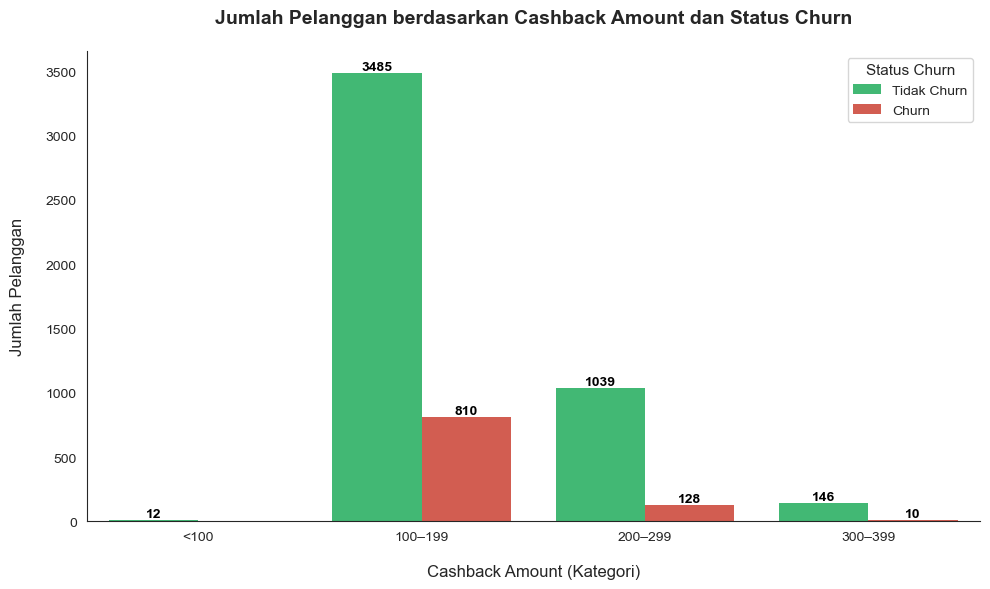

In [ ]:
def categorize_cashback(x):
    if x < 100:
        return '<100'
    elif 100 <= x < 200:
        return '100–199'
    elif 200 <= x < 300:
        return '200–299'
    elif 300 <= x < 400:
        return '300–399'

df['CashbackGroup'] = df['CashbackAmount'].apply(categorize_cashback)

cashback_counts = df.groupby(['CashbackGroup', 'Churn']).size().reset_index(name='Count')
cashback_counts = cashback_counts[cashback_counts['Count'] > 0]

order = ['<100', '100–199', '200–299', '300–399']

palette_colors = {0: '#2ecc71', 1: '#e74c3c'}

plt.figure(figsize=(10,6))
sns.set_style("white")

ax = sns.barplot(
    data=cashback_counts,
    x='CashbackGroup',
    y='Count',
    hue='Churn',
    palette=palette_colors,
    order=order,
    linewidth=0
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', fontweight='bold')

plt.title('Jumlah Pelanggan berdasarkan Cashback Amount dan Status Churn',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cashback Amount (Kategori)', fontsize=12, labelpad=15)
plt.ylabel('Jumlah Pelanggan', fontsize=12, labelpad=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Tidak Churn', 'Churn'],
           title='Status Churn', fontsize=10,
           title_fontsize=11, loc='upper right')

ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

**Insights:** Variabel Cashback Amount merepresentasikan total nilai cashback yang diterima pelanggan dari transaksi di platform e-commerce. Berdasarkan grafik, pelanggan dengan cashback sebesar 100–199 merupakan kelompok terbesar, dengan 3.485 pelanggan tidak churn dan 810 pelanggan churn. Jumlah pelanggan menurun pada kelompok cashback yang lebih tinggi (200–299 dan 300–399), dengan tingkat churn yang juga lebih rendah — hanya 128 dan 10 pelanggan churn secara berurutan.

Hasil uji Mann-Whitney menunjukkan H₀ ditolak (p < 0.05), yang berarti terdapat perbedaan signifikan antara distribusi cashback pelanggan churn dan tidak churn. Dengan kata lain, tingkat cashback berpengaruh terhadap kemungkinan pelanggan berhenti bertransaksi.

Secara bisnis, temuan ini mengindikasikan bahwa pelanggan dengan cashback lebih tinggi cenderung memiliki loyalitas yang lebih kuat, sedangkan kelompok dengan cashback rendah lebih rentan untuk churn. Hal ini memperkuat bahwa insentif finansial seperti cashback dapat menjadi faktor penting dalam menjaga retensi pelanggan e-commerce, terutama pada segmen dengan nilai pembelian moderat. Untuk meningkatkan efektivitasnya, platform dapat menerapkan program cashback berjenjang atau reward berbasis frekuensi pembelian agar pelanggan terdorong untuk tetap aktif bertransaksi.

##

### 2. Strategy Recommendation

#### 2.1 Customer Retention & Early Engagement

**Stakeholders:** Marketing & Engineering

* Onboarding Experience Optimization: Pelanggan dengan tenure rendah (0–6 hari) memiliki tingkat churn tertinggi. Diperlukan welcome program seperti panduan penggunaan aplikasi, first-purchase discount, dan in-app tutorial agar pelanggan baru langsung merasakan nilai dari platform.

* Behavior-based Trigger Campaign: Implementasikan sistem peringatan dini dengan mendeteksi pelanggan beraktivitas rendah (misalnya hanya 1–2 pesanan per bulan) dan tawarkan personalized reactivation promo atau free shipping untuk mendorong pembelian berikutnya.

* Gamification Loyalty System: Gunakan sistem poin berbasis aktivitas pembelian untuk menciptakan rasa keterikatan sejak awal dan meningkatkan frekuensi transaksi.

#### 2.2 Service Quality & Complaint Management

**Stakeholders:** Marketing, Data Analysis, & Engineering 

* Complaint Resolution Fast Track: Pelanggan yang pernah komplain memiliki proporsi churn jauh lebih tinggi. Implementasikan SLA (Service Level Agreement) khusus untuk menutup keluhan dalam waktu <24 jam dan buat priority support channel bagi pelanggan berulang.

* Satisfaction Score Monitoring: Meskipun hasil uji menunjukkan pengaruh signifikan, hubungan antara kepuasan dan churn bersifat non-linear. Oleh karena itu, perlu dilakukan deep dive analisis aspek layanan yang paling memengaruhi kepuasan (pengiriman, respon CS, refund, dsb.) untuk fokus perbaikan yang tepat sasaran.

* Experience Recovery Program: Kirimkan kompensasi seperti voucher atau cashback tambahan bagi pelanggan yang baru saja mengajukan komplain agar persepsi negatif dapat dipulihkan sebelum memicu churn.

#### 2.3 Monetary Incentive & Value Reinforcement

**Stakeholders:** Marketing

* Tiered Cashback System: Analisis menunjukkan bahwa semakin besar cashback, semakin rendah tingkat churn. E-commerce dapat menerapkan sistem cashback tier (misalnya Bronze–Silver–Gold) berdasarkan frekuensi dan nilai transaksi untuk mendorong loyalitas jangka panjang.

* Geo-based Logistic Incentive: Karena jarak dari warehouse berpengaruh signifikan terhadap churn, berikan insentif seperti free delivery atau regional voucher untuk pelanggan yang berlokasi jauh, terutama >15 km dari pusat distribusi.

* Behavior-driven Offer Personalization: Gunakan data pembelian dan histori cashback untuk menyesuaikan promosi. Misalnya, pelanggan dengan pembelian laptop dan gadget dapat diberikan promo tech bundle cashback, sedangkan pelanggan fashion diarahkan ke promo musiman berbasis tren.

#### 2.4 Optimization of Non-significant Drivers

**Stakeholders:** Marketing

* Purchase Value Reinforcement: Walau kenaikan nilai pembelian tahunan belum berpengaruh signifikan, hal ini bisa disebabkan oleh promosi jangka pendek. Maka, perlu difokuskan pada long-term value seperti program VIP customer atau lifetime discount tiers.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion

Berdasarkan hasil analisis, dapat disimpulkan bahwa perilaku churn pelanggan pada platform e-commerce dipengaruhi oleh kombinasi faktor perilaku, pengalaman layanan, dan insentif transaksi. Pelanggan dengan tenure yang pendek, jarak pengiriman yang jauh, serta riwayat komplain menunjukkan kecenderungan churn yang lebih tinggi, sementara pelanggan yang menerima cashback lebih besar dan memiliki aktivitas pembelian lebih sering cenderung lebih loyal. Temuan ini menegaskan pentingnya strategi retensi yang berfokus pada personalisasi promosi, pengelolaan pengalaman pelanggan, dan pemberian insentif berbasis perilaku untuk secara efektif menekan churn di masa mendatang.